In [1]:
import pandas as pd
import numpy as np
from sklearn import preprocessing

In [2]:
pd.options.display.max_columns = None
pd.options.display.max_rows = None

In [3]:
raw_data = pd.read_csv('insurance.csv')
raw_data

index  age     sex     bmi  children smoker     region       charges
0         0   19  female  27.900         0    yes  southwest  16884.924000
1         1   18    male  33.770         1     no  southeast   1725.552300
2         2   28    male  33.000         3     no  southeast   4449.462000
3         3   33    male  22.705         0     no  northwest  21984.470610
4         4   32    male  28.880         0     no  northwest   3866.855200
5         5   31  female  25.740         0     no  southeast   3756.621600
6         6   46  female  33.440         1     no  southeast   8240.589600
7         7   37  female  27.740         3     no  northwest   7281.505600
8         8   37    male  29.830         2     no  northeast   6406.410700
9         9   60  female  25.840         0     no  northwest  28923.136920
10       10   25    male  26.220         0     no  northeast   2721.320800
11       11   62  female  26.290         0    yes  southeast  27808.725100
12       12   23    male  34.400         0     no  southwest   1826.843000
13       13   56  female  39.820         0     no  southeast  11090.717800
14       14   27    male  42.130         0    yes  southeast  39611.757700
15       15   19    male  24.600         1     no  southwest   1837.237000
16       16   52  female  30.780         1     no  northeast  10797.336200
17       17   23    male  23.845         0     no  northeast   2395.171550
18       18   56    male  40.300         0     no  southwest  10602.385000
19       19   30    male  35.300         0    yes  southwest  36837.467000
20       20   60  female  36.005         0     no  northeast  13228.846950
21       21   30  female  32.400         1     no  southwest   4149.736000
22       22   18    male  34.100         0     no  southeast   1137.011000
23       23   34  female  31.920         1    yes  northeast  37701.876800
24       24   37    male  28.025         2     no  northwest   6203.901750
25       25   59  female  27.720         3     no  southeast  14001.133800
26       26   63  female  23.085         0     no  northeast  14451.835150
27       27   55  female  32.775         2     no  northwest  12268.632250
28       28   23    male  17.385         1     no  northwest   2775.192150
29       29   31    male  36.300         2    yes  southwest  38711.000000
30       30   22    male  35.600         0    yes  southwest  35585.576000
31       31   18  female  26.315         0     no  northeast   2198.189850
32       32   19  female  28.600         5     no  southwest   4687.797000
33       33   63    male  28.310         0     no  northwest  13770.097900
34       34   28    male  36.400         1    yes  southwest  51194.559140
35       35   19    male  20.425         0     no  northwest   1625.433750
36       36   62  female  32.965         3     no  northwest  15612.193350
37       37   26    male  20.800         0     no  southwest   2302.300000
38       38   35    male  36.670         1    yes  northeast  39774.276300
39       39   60    male  39.900         0    yes  southwest  48173.361000
40       40   24  female  26.600         0     no  northeast   3046.062000
41       41   31  female  36.630         2     no  southeast   4949.758700
42       42   41    male  21.780         1     no  southeast   6272.477200
43       43   37  female  30.800         2     no  southeast   6313.759000
44       44   38    male  37.050         1     no  northeast   6079.671500
45       45   55    male  37.300         0     no  southwest  20630.283510
46       46   18  female  38.665         2     no  northeast   3393.356350
47       47   28  female  34.770         0     no  northwest   3556.922300
48       48   60  female  24.530         0     no  southeast  12629.896700
49       49   36    male  35.200         1    yes  southeast  38709.176000
50       50   18  female  35.625         0     no  northeast   2211.130750
51       51   21  female  33.630         2     no  northwest   3579.828700
52       52   48    male  28.00

In [4]:
raw_data = raw_data.drop('index', axis = 1)
raw_data

age     sex     bmi  children smoker     region       charges
0      19  female  27.900         0    yes  southwest  16884.924000
1      18    male  33.770         1     no  southeast   1725.552300
2      28    male  33.000         3     no  southeast   4449.462000
3      33    male  22.705         0     no  northwest  21984.470610
4      32    male  28.880         0     no  northwest   3866.855200
5      31  female  25.740         0     no  southeast   3756.621600
6      46  female  33.440         1     no  southeast   8240.589600
7      37  female  27.740         3     no  northwest   7281.505600
8      37    male  29.830         2     no  northeast   6406.410700
9      60  female  25.840         0     no  northwest  28923.136920
10     25    male  26.220         0     no  northeast   2721.320800
11     62  female  26.290         0    yes  southeast  27808.725100
12     23    male  34.400         0     no  southwest   1826.843000
13     56  female  39.820         0     no  southeast  11090.717800
14     27    male  42.130         0    yes  southeast  39611.757700
15     19    male  24.600         1     no  southwest   1837.237000
16     52  female  30.780         1     no  northeast  10797.336200
17     23    male  23.845         0     no  northeast   2395.171550
18     56    male  40.300         0     no  southwest  10602.385000
19     30    male  35.300         0    yes  southwest  36837.467000
20     60  female  36.005         0     no  northeast  13228.846950
21     30  female  32.400         1     no  southwest   4149.736000
22     18    male  34.100         0     no  southeast   1137.011000
23     34  female  31.920         1    yes  northeast  37701.876800
24     37    male  28.025         2     no  northwest   6203.901750
25     59  female  27.720         3     no  southeast  14001.133800
26     63  female  23.085         0     no  northeast  14451.835150
27     55  female  32.775         2     no  northwest  12268.632250
28     23    male  17.385         1     no  northwest   2775.192150
29     31    male  36.300         2    yes  southwest  38711.000000
30     22    male  35.600         0    yes  southwest  35585.576000
31     18  female  26.315         0     no  northeast   2198.189850
32     19  female  28.600         5     no  southwest   4687.797000
33     63    male  28.310         0     no  northwest  13770.097900
34     28    male  36.400         1    yes  southwest  51194.559140
35     19    male  20.425         0     no  northwest   1625.433750
36     62  female  32.965         3     no  northwest  15612.193350
37     26    male  20.800         0     no  southwest   2302.300000
38     35    male  36.670         1    yes  northeast  39774.276300
39     60    male  39.900         0    yes  southwest  48173.361000
40     24  female  26.600         0     no  northeast   3046.062000
41     31  female  36.630         2     no  southeast   4949.758700
42     41    male  21.780         1     no  southeast   6272.477200
43     37  female  30.800         2     no  southeast   6313.759000
44     38    male  37.050         1     no  northeast   6079.671500
45     55    male  37.300         0     no  southwest  20630.283510
46     18  female  38.665         2     no  northeast   3393.356350
47     28  female  34.770         0     no  northwest   3556.922300
48     60  female  24.530         0     no  southeast  12629.896700
49     36    male  35.200         1    yes  southeast  38709.176000
50     18  female  35.625         0     no  northeast   2211.130750
51     21  female  33.630         2     no  northwest   3579.828700
52     48    male  28.000         1    yes  southwest  23568.272000
53     36    male  34.430         0    yes  southeast  37742.575700
54     40  female  28.690         3     no  northwest   8059.679100
55     58    male  36.955         2    yes  northwest  47496.494450
56     58  female  31.825         2     no  northeast  13607.368750
57     18    male  31.680         2    yes  southeast  34303.1

### Remap categorical values to binary

In [5]:
raw_data_binary = raw_data.copy()

In [6]:
raw_data_binary['sex'] = raw_data_binary['sex'].map({'female':1, 'male':0})
raw_data_binary

age  sex     bmi  children smoker     region       charges
0      19    1  27.900         0    yes  southwest  16884.924000
1      18    0  33.770         1     no  southeast   1725.552300
2      28    0  33.000         3     no  southeast   4449.462000
3      33    0  22.705         0     no  northwest  21984.470610
4      32    0  28.880         0     no  northwest   3866.855200
5      31    1  25.740         0     no  southeast   3756.621600
6      46    1  33.440         1     no  southeast   8240.589600
7      37    1  27.740         3     no  northwest   7281.505600
8      37    0  29.830         2     no  northeast   6406.410700
9      60    1  25.840         0     no  northwest  28923.136920
10     25    0  26.220         0     no  northeast   2721.320800
11     62    1  26.290         0    yes  southeast  27808.725100
12     23    0  34.400         0     no  southwest   1826.843000
13     56    1  39.820         0     no  southeast  11090.717800
14     27    0  42.130         0    yes  southeast  39611.757700
15     19    0  24.600         1     no  southwest   1837.237000
16     52    1  30.780         1     no  northeast  10797.336200
17     23    0  23.845         0     no  northeast   2395.171550
18     56    0  40.300         0     no  southwest  10602.385000
19     30    0  35.300         0    yes  southwest  36837.467000
20     60    1  36.005         0     no  northeast  13228.846950
21     30    1  32.400         1     no  southwest   4149.736000
22     18    0  34.100         0     no  southeast   1137.011000
23     34    1  31.920         1    yes  northeast  37701.876800
24     37    0  28.025         2     no  northwest   6203.901750
25     59    1  27.720         3     no  southeast  14001.133800
26     63    1  23.085         0     no  northeast  14451.835150
27     55    1  32.775         2     no  northwest  12268.632250
28     23    0  17.385         1     no  northwest   2775.192150
29     31    0  36.300         2    yes  southwest  38711.000000
30     22    0  35.600         0    yes  southwest  35585.576000
31     18    1  26.315         0     no  northeast   2198.189850
32     19    1  28.600         5     no  southwest   4687.797000
33     63    0  28.310         0     no  northwest  13770.097900
34     28    0  36.400         1    yes  southwest  51194.559140
35     19    0  20.425         0     no  northwest   1625.433750
36     62    1  32.965         3     no  northwest  15612.193350
37     26    0  20.800         0     no  southwest   2302.300000
38     35    0  36.670         1    yes  northeast  39774.276300
39     60    0  39.900         0    yes  southwest  48173.361000
40     24    1  26.600         0     no  northeast   3046.062000
41     31    1  36.630         2     no  southeast   4949.758700
42     41    0  21.780         1     no  southeast   6272.477200
43     37    1  30.800         2     no  southeast   6313.759000
44     38    0  37.050         1     no  northeast   6079.671500
45     55    0  37.300         0     no  southwest  20630.283510
46     18    1  38.665         2     no  northeast   3393.356350
47     28    1  34.770         0     no  northwest   3556.922300
48     60    1  24.530         0     no  southeast  12629.896700
49     36    0  35.200         1    yes  southeast  38709.176000
50     18    1  35.625         0     no  northeast   2211.130750
51     21    1  33.630         2     no  northwest   3579.828700
52     48    0  28.000         1    yes  southwest  23568.272000
53     36    0  34.430         0    yes  southeast  37742.575700
54     40    1  28.690         3     no  northwest   8059.679100
55     58    0  36.955         2    yes  northwest  47496.494450
56     58    1  31.825         2     no  northeast  13607.368750
57     18    0  31.680         2    yes  southeast  34303.167200
58     53    1  22.880         1    yes  southeast  23244.790200
59     34    1  37.335         2     no  northwest   5989.523650
60     43    0  27.360         3     no  

In [7]:
raw_data_binary['smoker'].unique()

array(['yes', 'no'], dtype=object)

In [8]:
raw_data_binary['smoker'] = raw_data_binary['smoker'].map({'no':0, 'yes':1})
raw_data_binary

age  sex     bmi  children  smoker     region       charges
0      19    1  27.900         0       1  southwest  16884.924000
1      18    0  33.770         1       0  southeast   1725.552300
2      28    0  33.000         3       0  southeast   4449.462000
3      33    0  22.705         0       0  northwest  21984.470610
4      32    0  28.880         0       0  northwest   3866.855200
5      31    1  25.740         0       0  southeast   3756.621600
6      46    1  33.440         1       0  southeast   8240.589600
7      37    1  27.740         3       0  northwest   7281.505600
8      37    0  29.830         2       0  northeast   6406.410700
9      60    1  25.840         0       0  northwest  28923.136920
10     25    0  26.220         0       0  northeast   2721.320800
11     62    1  26.290         0       1  southeast  27808.725100
12     23    0  34.400         0       0  southwest   1826.843000
13     56    1  39.820         0       0  southeast  11090.717800
14     27    0  42.130         0       1  southeast  39611.757700
15     19    0  24.600         1       0  southwest   1837.237000
16     52    1  30.780         1       0  northeast  10797.336200
17     23    0  23.845         0       0  northeast   2395.171550
18     56    0  40.300         0       0  southwest  10602.385000
19     30    0  35.300         0       1  southwest  36837.467000
20     60    1  36.005         0       0  northeast  13228.846950
21     30    1  32.400         1       0  southwest   4149.736000
22     18    0  34.100         0       0  southeast   1137.011000
23     34    1  31.920         1       1  northeast  37701.876800
24     37    0  28.025         2       0  northwest   6203.901750
25     59    1  27.720         3       0  southeast  14001.133800
26     63    1  23.085         0       0  northeast  14451.835150
27     55    1  32.775         2       0  northwest  12268.632250
28     23    0  17.385         1       0  northwest   2775.192150
29     31    0  36.300         2       1  southwest  38711.000000
30     22    0  35.600         0       1  southwest  35585.576000
31     18    1  26.315         0       0  northeast   2198.189850
32     19    1  28.600         5       0  southwest   4687.797000
33     63    0  28.310         0       0  northwest  13770.097900
34     28    0  36.400         1       1  southwest  51194.559140
35     19    0  20.425         0       0  northwest   1625.433750
36     62    1  32.965         3       0  northwest  15612.193350
37     26    0  20.800         0       0  southwest   2302.300000
38     35    0  36.670         1       1  northeast  39774.276300
39     60    0  39.900         0       1  southwest  48173.361000
40     24    1  26.600         0       0  northeast   3046.062000
41     31    1  36.630         2       0  southeast   4949.758700
42     41    0  21.780         1       0  southeast   6272.477200
43     37    1  30.800         2       0  southeast   6313.759000
44     38    0  37.050         1       0  northeast   6079.671500
45     55    0  37.300         0       0  southwest  20630.283510
46     18    1  38.665         2       0  northeast   3393.356350
47     28    1  34.770         0       0  northwest   3556.922300
48     60    1  24.530         0       0  southeast  12629.896700
49     36    0  35.200         1       1  southeast  38709.176000
50     18    1  35.625         0       0  northeast   2211.130750
51     21    1  33.630         2       0  northwest   3579.828700
52     48    0  28.000         1       1  southwest  23568.272000
53     36    0  34.430         0       1  southeast  37742.575700
54     40    1  28.690         3       0  northwest   8059.679100
55     58    0  36.955         2       1  northwest  47496.494450
56     58    1  31.825         2       0  northeast  13607.368750
57     18    0  31.680         2       1  southeast  34303.167200
58     53    1  22.880         1       1  southeast  23244.790200
59     34    1  37.335         2       0  nort

In [9]:
raw_data_binary['region'].unique()

array(['southwest', 'southeast', 'northwest', 'northeast'], dtype=object)

In [10]:
region_dummies = pd.get_dummies(raw_data_binary['region'])
region_dummies

northeast  northwest  southeast  southwest
0             0          0          0          1
1             0          0          1          0
2             0          0          1          0
3             0          1          0          0
4             0          1          0          0
5             0          0          1          0
6             0          0          1          0
7             0          1          0          0
8             1          0          0          0
9             0          1          0          0
10            1          0          0          0
11            0          0          1          0
12            0          0          0          1
13            0          0          1          0
14            0          0          1          0
15            0          0          0          1
16            1          0          0          0
17            1          0          0          0
18            0          0          0          1
19            0          0          0          1
20            1          0          0          0
21            0          0          0          1
22            0          0          1          0
23            1          0          0          0
24            0          1          0          0
25            0          0          1          0
26            1          0          0          0
27            0          1          0          0
28            0          1          0          0
29            0          0          0          1
30            0          0          0          1
31            1          0          0          0
32            0          0          0          1
33            0          1          0          0
34            0          0          0          1
35            0          1          0          0
36            0          1          0          0
37            0          0          0          1
38            1          0          0          0
39            0          0          0          1
40            1          0          0          0
41            0          0          1          0
42            0          0          1          0
43            0          0          1          0
44            1          0          0          0
45            0          0          0          1
46            1          0          0          0
47            0          1          0          0
48            0          0          1          0
49            0          0          1          0
50            1          0          0          0
51            0          1          0          0
52            0          0          0          1
53            0          0          1          0
54            0          1          0          0
55            0          1          0          0
56            1          0          0          0
57            0          0          1          0
58            0          0          1          0
59            0          1          0          0
60            1          0          0          0
61            0          0          1          0
62            0          1          0          0
63            0          1          0          0
64            0          1          0          0
65            0          0          0          1
66            0          0          0          1
67            0          1          0          0
68            0          0          1          0
69            0          0          1          0
70            0          0          1          0
71            1          0          0          0
72            0          0          0          1
73            0          0          1          0
74            0          0          0          1
75            0          1          0          0
76            0          0          1          0
77            0          0          1          0
78            1          0          0          0
79            0          1          0          0
80            1          0          0

In [11]:
region_dummies['check'] = region_dummies.sum(axis=1)
region_dummies

northeast  northwest  southeast  southwest  check
0             0          0          0          1      1
1             0          0          1          0      1
2             0          0          1          0      1
3             0          1          0          0      1
4             0          1          0          0      1
5             0          0          1          0      1
6             0          0          1          0      1
7             0          1          0          0      1
8             1          0          0          0      1
9             0          1          0          0      1
10            1          0          0          0      1
11            0          0          1          0      1
12            0          0          0          1      1
13            0          0          1          0      1
14            0          0          1          0      1
15            0          0          0          1      1
16            1          0          0          0      1
17            1          0          0          0      1
18            0          0          0          1      1
19            0          0          0          1      1
20            1          0          0          0      1
21            0          0          0          1      1
22            0          0          1          0      1
23            1          0          0          0      1
24            0          1          0          0      1
25            0          0          1          0      1
26            1          0          0          0      1
27            0          1          0          0      1
28            0          1          0          0      1
29            0          0          0          1      1
30            0          0          0          1      1
31            1          0          0          0      1
32            0          0          0          1      1
33            0          1          0          0      1
34            0          0          0          1      1
35            0          1          0          0      1
36            0          1          0          0      1
37            0          0          0          1      1
38            1          0          0          0      1
39            0          0          0          1      1
40            1          0          0          0      1
41            0          0          1          0      1
42            0          0          1          0      1
43            0          0          1          0      1
44            1          0          0          0      1
45            0          0          0          1      1
46            1          0          0          0      1
47            0          1          0          0      1
48            0          0          1          0      1
49            0          0          1          0      1
50            1          0          0          0      1
51            0          1          0          0      1
52            0          0          0          1      1
53            0          0          1          0      1
54            0          1          0          0      1
55            0          1          0          0      1
56            1          0          0          0      1
57            0          0          1          0      1
58            0          0          1          0      1
59            0          1          0          0      1
60            1          0          0          0      1
61            0          0          1          0      1
62            0          1          0          0      1
63            0          1          0          0      1
64            0          1          0          0      1
65            0          0          0          1      1
66            0          0          0          1      1
67            0          1          0          0      1
68            0          0          1          0      1
69            0          0          1          0      1
70            0          0    

In [12]:
region_dummies['check'].sum(axis=0)

1338

In [ ]:
## based on total above no missing data in region from original data set

In [13]:
region_dummies = region_dummies.drop(['check'], axis=1)
region_dummies = region_dummies.drop(['northeast'], axis=1)

In [14]:
#need to drop first column to prevent multicolinearity
region_dummies = pd.get_dummies(raw_data_binary['region'], drop_first = True)
region_dummies

northwest  southeast  southwest
0             0          0          1
1             0          1          0
2             0          1          0
3             1          0          0
4             1          0          0
5             0          1          0
6             0          1          0
7             1          0          0
8             0          0          0
9             1          0          0
10            0          0          0
11            0          1          0
12            0          0          1
13            0          1          0
14            0          1          0
15            0          0          1
16            0          0          0
17            0          0          0
18            0          0          1
19            0          0          1
20            0          0          0
21            0          0          1
22            0          1          0
23            0          0          0
24            1          0          0
25            0          1          0
26            0          0          0
27            1          0          0
28            1          0          0
29            0          0          1
30            0          0          1
31            0          0          0
32            0          0          1
33            1          0          0
34            0          0          1
35            1          0          0
36            1          0          0
37            0          0          1
38            0          0          0
39            0          0          1
40            0          0          0
41            0          1          0
42            0          1          0
43            0          1          0
44            0          0          0
45            0          0          1
46            0          0          0
47            1          0          0
48            0          1          0
49            0          1          0
50            0          0          0
51            1          0          0
52            0          0          1
53            0          1          0
54            1          0          0
55            1          0          0
56            0          0          0
57            0          1          0
58            0          1          0
59            1          0          0
60            0          0          0
61            0          1          0
62            1          0          0
63            1          0          0
64            1          0          0
65            0          0          1
66            0          0          1
67            1          0          0
68            0          1          0
69            0          1          0
70            0          1          0
71            0          0          0
72            0          0          1
73            0          1          0
74            0          0          1
75            1          0          0
76            0          1          0
77            0          1          0
78            0          0          0
79            1          0          0
80            0          0          0
81            0          0          0
82            0          1          0
83            1          0          0
84            0          0          1
85            1          0          0
86            1          0          0
87            0          0          1
88            1          0          0
89            1          0          0
90            0          1          0
91            1          0          0
92            0          0          0
93            1          0          0
94            0          0          1
95            0          1          0
96            0          0          1
97            0          1          0
98            0          0          0
99            0          0          1
100           0          0          1
101           0          0          0
102           0          0          0
103           0          1          0
104           0 

In [15]:
df = pd.concat([raw_data_binary, region_dummies], axis=1)
df

age  sex     bmi  children  smoker     region       charges  northwest  \
0      19    1  27.900         0       1  southwest  16884.924000          0   
1      18    0  33.770         1       0  southeast   1725.552300          0   
2      28    0  33.000         3       0  southeast   4449.462000          0   
3      33    0  22.705         0       0  northwest  21984.470610          1   
4      32    0  28.880         0       0  northwest   3866.855200          1   
5      31    1  25.740         0       0  southeast   3756.621600          0   
6      46    1  33.440         1       0  southeast   8240.589600          0   
7      37    1  27.740         3       0  northwest   7281.505600          1   
8      37    0  29.830         2       0  northeast   6406.410700          0   
9      60    1  25.840         0       0  northwest  28923.136920          1   
10     25    0  26.220         0       0  northeast   2721.320800          0   
11     62    1  26.290         0       1  southeast  27808.725100          0   
12     23    0  34.400         0       0  southwest   1826.843000          0   
13     56    1  39.820         0       0  southeast  11090.717800          0   
14     27    0  42.130         0       1  southeast  39611.757700          0   
15     19    0  24.600         1       0  southwest   1837.237000          0   
16     52    1  30.780         1       0  northeast  10797.336200          0   
17     23    0  23.845         0       0  northeast   2395.171550          0   
18     56    0  40.300         0       0  southwest  10602.385000          0   
19     30    0  35.300         0       1  southwest  36837.467000          0   
20     60    1  36.005         0       0  northeast  13228.846950          0   
21     30    1  32.400         1       0  southwest   4149.736000          0   
22     18    0  34.100         0       0  southeast   1137.011000          0   
23     34    1  31.920         1       1  northeast  37701.876800          0   
24     37    0  28.025         2       0  northwest   6203.901750          1   
25     59    1  27.720         3       0  southeast  14001.133800          0   
26     63    1  23.085         0       0  northeast  14451.835150          0   
27     55    1  32.775         2       0  northwest  12268.632250          1   
28     23    0  17.385         1       0  northwest   2775.192150          1   
29     31    0  36.300         2       1  southwest  38711.000000          0   
30     22    0  35.600         0       1  southwest  35585.576000          0   
31     18    1  26.315         0       0  northeast   2198.189850          0   
32     19    1  28.600         5       0  southwest   4687.797000          0   
33     63    0  28.310         0       0  northwest  13770.097900          1   
34     28    0  36.400         1       1  southwest  51194.559140          0   
35     19    0  20.425         0       0  northwest   1625.433750          1   
36     62    1  32.965         3       0  northwest  15612.193350          1   
37     26    0  20.800         0       0  southwest   2302.300000          0   
38     35    0  36.670         1       1  northeast  39774.276300          0   
39     60    0  39.900         0       1  southwest  48173.361000          0   
40     24    1  26.600         0       0  northeast   3046.062000          0   
41     31    1  36.630         2       0  southeast   4949.758700          0   
42     41    0  21.780         1       0  southeast   6272.477200          0   
43     37    1  30.800         2       0  southeast   6313.759000          0   
44     38    0  37.050         1       0  northeast   6079.671500          0   
45     55    0  37.300         0       0  southwest  20630.283510          0   
46     18    1  38.665         2       0  northeast   3393.356350          0   
47     28    1  34.770         0       0  northwest   3556.922300          1   
48     60    1  24.530         0       0  southeast  12629.896700          0   
49    

In [16]:
df = df.drop(['region'], axis=1)
df

age  sex     bmi  children  smoker       charges  northwest  southeast  \
0      19    1  27.900         0       1  16884.924000          0          0   
1      18    0  33.770         1       0   1725.552300          0          1   
2      28    0  33.000         3       0   4449.462000          0          1   
3      33    0  22.705         0       0  21984.470610          1          0   
4      32    0  28.880         0       0   3866.855200          1          0   
5      31    1  25.740         0       0   3756.621600          0          1   
6      46    1  33.440         1       0   8240.589600          0          1   
7      37    1  27.740         3       0   7281.505600          1          0   
8      37    0  29.830         2       0   6406.410700          0          0   
9      60    1  25.840         0       0  28923.136920          1          0   
10     25    0  26.220         0       0   2721.320800          0          0   
11     62    1  26.290         0       1  27808.725100          0          1   
12     23    0  34.400         0       0   1826.843000          0          0   
13     56    1  39.820         0       0  11090.717800          0          1   
14     27    0  42.130         0       1  39611.757700          0          1   
15     19    0  24.600         1       0   1837.237000          0          0   
16     52    1  30.780         1       0  10797.336200          0          0   
17     23    0  23.845         0       0   2395.171550          0          0   
18     56    0  40.300         0       0  10602.385000          0          0   
19     30    0  35.300         0       1  36837.467000          0          0   
20     60    1  36.005         0       0  13228.846950          0          0   
21     30    1  32.400         1       0   4149.736000          0          0   
22     18    0  34.100         0       0   1137.011000          0          1   
23     34    1  31.920         1       1  37701.876800          0          0   
24     37    0  28.025         2       0   6203.901750          1          0   
25     59    1  27.720         3       0  14001.133800          0          1   
26     63    1  23.085         0       0  14451.835150          0          0   
27     55    1  32.775         2       0  12268.632250          1          0   
28     23    0  17.385         1       0   2775.192150          1          0   
29     31    0  36.300         2       1  38711.000000          0          0   
30     22    0  35.600         0       1  35585.576000          0          0   
31     18    1  26.315         0       0   2198.189850          0          0   
32     19    1  28.600         5       0   4687.797000          0          0   
33     63    0  28.310         0       0  13770.097900          1          0   
34     28    0  36.400         1       1  51194.559140          0          0   
35     19    0  20.425         0       0   1625.433750          1          0   
36     62    1  32.965         3       0  15612.193350          1          0   
37     26    0  20.800         0       0   2302.300000          0          0   
38     35    0  36.670         1       1  39774.276300          0          0   
39     60    0  39.900         0       1  48173.361000          0          0   
40     24    1  26.600         0       0   3046.062000          0          0   
41     31    1  36.630         2       0   4949.758700          0          1   
42     41    0  21.780         1       0   6272.477200          0          1   
43     37    1  30.800         2       0   6313.759000          0          1   
44     38    0  37.050         1       0   6079.671500          0          0   
45     55    0  37.300         0       0  20630.283510          0          0   
46     18    1  38.665         2       0   3393.356350          0          0   
47     28    1  34.770         0       0   3556.922300          1          0   
48     60    1  24.530         0       0  12629.896700          0          1   
49    

In [17]:
df['children'].unique()

array([0, 1, 3, 2, 5, 4], dtype=int64)

In [18]:
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler

class CustomScaler(BaseEstimator, TransformerMixin):
    
    def __init__(self, columns):
        self.scaler = StandardScaler()
        self.columns = columns
        self.mean_ = None
        self.var_ = None
        
    def fit(self, X, y=None):
        self.scaler.fit(X[self.columns], y)
        self.mean_ = np.mean(X[self.columns])
        self.var_ = np.var(X[self.columns])
        return self
    
    def transform(self, X, y=None, copy=None):
        init_col_order = X.columns
        X_scaled = pd.DataFrame(self.scaler.transform(X[self.columns]), columns=self.columns)
        X_not_scaled = X.loc[:,~X.columns.isin(self.columns)]
        return pd.concat([X_not_scaled, X_scaled], axis=1)[init_col_order]

In [ ]:
# 1 scale inputs
# 2 randomize
# perhaps run model treating# of kids as categorical variable

In [19]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1338 entries, 0 to 1337
Data columns (total 9 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        1338 non-null   int64  
 1   sex        1338 non-null   int64  
 2   bmi        1338 non-null   float64
 3   children   1338 non-null   int64  
 4   smoker     1338 non-null   int64  
 5   charges    1338 non-null   float64
 6   northwest  1338 non-null   uint8  
 7   southeast  1338 non-null   uint8  
 8   southwest  1338 non-null   uint8  
dtypes: float64(2), int64(4), uint8(3)
memory usage: 66.8 KB


In [20]:
df.columns.values

array(['age', 'sex', 'bmi', 'children', 'smoker', 'charges', 'northwest',
       'southeast', 'southwest'], dtype=object)

In [21]:
## scale column values
## assigning specific column values to 
columns_to_scale = ['age', 'bmi', 'charges']

In [22]:
insurance_scaler = CustomScaler(columns_to_scale)

In [23]:
insurance_scaler.fit(df)

C:\Users\asaqu\anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3438: FutureWarning: In a future version, DataFrame.mean(axis=None) will return a scalar mean over the entire DataFrame. To retain the old behavior, use 'frame.mean(axis=0)' or just 'frame.mean()'
  return mean(axis=axis, dtype=dtype, out=out, **kwargs)


CustomScaler(columns=['age', 'bmi', 'charges'])

In [24]:
df_scaled = insurance_scaler.transform(df)

In [25]:
df_scaled

age  sex       bmi  children  smoker   charges  northwest  \
0    -1.438764    1 -0.453320         0       1  0.298584          0   
1    -1.509965    0  0.509621         1       0 -0.953689          0   
2    -0.797954    0  0.383307         3       0 -0.728675          0   
3    -0.441948    0 -1.305531         0       0  0.719843          1   
4    -0.513149    0 -0.292556         0       0 -0.776802          1   
5    -0.584350    1 -0.807656         0       0 -0.785908          0   
6     0.483668    1  0.455486         1       0 -0.415500          0   
7    -0.157143    1 -0.479567         3       0 -0.494728          1   
8    -0.157143    0 -0.136714         2       0 -0.567017          0   
9     1.480485    1 -0.791252         0       0  1.293027          1   
10   -1.011557    0 -0.728915         0       0 -0.871432          0   
11    1.622887    1 -0.717432         0       1  1.200968          0   
12   -1.153959    0  0.612969         0       0 -0.945322          0   
13    1.195680    1  1.502090         0       0 -0.180059          0   
14   -0.869155    0  1.881033         0       1  2.175983          0   
15   -1.438764    0 -0.994667         1       0 -0.944463          0   
16    0.910875    1  0.019128         1       0 -0.204295          0   
17   -1.153959    0 -1.118520         0       0 -0.898374          0   
18    1.195680    0  1.580832         0       0 -0.220399          0   
19   -0.655551    0  0.760609         0       1  1.946807          0   
20    1.480485    1  0.876261         0       0 -0.003434          0   
21   -0.655551    1  0.284880         1       0 -0.753434          0   
22   -1.509965    0  0.563756         0       0 -1.002307          0   
23   -0.370746    1  0.206139         1       1  2.018214          0   
24   -0.157143    0 -0.432814         2       0 -0.583745          1   
25    1.409283    1 -0.482848         3       0  0.060362          0   
26    1.694088    1 -1.243194         0       0  0.097593          0   
27    1.124479    1  0.346397         2       0 -0.082755          1   
28   -1.153959    0 -2.178248         1       0 -0.866981          1   
29   -0.584350    0  0.924654         2       1  2.101574          0   
30   -1.225161    0  0.809822         0       1  1.843392          0   
31   -1.509965    1 -0.713331         0       0 -0.914646          0   
32   -1.438764    1 -0.338489         5       0 -0.708986          0   
33    1.694088    0 -0.386062         0       0  0.041277          1   
34   -0.797954    0  0.941058         1       1  3.132806          0   
35   -1.438764    0 -1.679552         0       0 -0.961960          1   
36    1.622887    1  0.377565         3       0  0.193447          1   
37   -0.940356    0 -1.618036         0       0 -0.906046          0   
38   -0.299545    0  0.985350         1       1  2.189409          0   
39    1.480485    0  1.515214         0       1  2.883233          0   
40   -1.082758    1 -0.666578         0       0 -0.844606          0   
41   -0.584350    1  0.978788         2       0 -0.687347          0   
42    0.127662    0 -1.457272         1       0 -0.578081          0   
43   -0.157143    1  0.022409         2       0 -0.574670          0   
44   -0.085942    0  1.047687         1       0 -0.594008          0   
45    1.124479    0  1.088698         0       0  0.607977          0   
46   -1.509965    1  1.312619         2       0 -0.815917          0   
47   -0.797954    1  0.673666         0       0 -0.802405          1   
48    1.480485    1 -1.006150         0       0 -0.052912          0   
49   -0.228344    0  0.744205         1       1  2.101424          0   
50   -1.509965    1  0.813924         0       0 -0.913577          0   
51   -1.296362    1  0.486655         2       0 -0.800513          1   
52    0.626070    0 -0.436916         1       1  0.850676          0   
53   -0.228344    0  0.617890         0       1  2.021576          0   
54    0.056461    1 -0.323725         3       0 -0.

In [44]:
##randomize
shuffled_indices = np.arange(df_scaled.shape[0])
np.random.shuffle(shuffled_indices)



In [27]:
shuffled_indices

array([ 316,  649,  937, ..., 1331, 1024,  146])

In [45]:
df_shuffled = df_scaled.iloc[shuffled_indices]

In [46]:
## create target and input df
target_values = df_shuffled.iloc[:,5]


In [47]:
input_values1 = df_shuffled.iloc[:,:5]
input_values2 = df_shuffled.iloc[:,6:]
input_values = pd.concat([input_values1, input_values2], axis=1)

In [48]:
input_values.reset_index(inplace=True)
input_values = input_values.drop(['index'], axis=1)
input_values

age  sex       bmi  children  smoker  northwest  southeast  \
0    -0.370746    0 -0.600960         2       0          0          0   
1    -0.655551    1 -0.374579         1       1          0          1   
2    -1.367563    0  1.433192         2       1          0          0   
3    -0.655551    0  0.760609         0       1          0          0   
4     1.765289    0  0.629374         0       0          0          0   
5     0.768473    1 -0.089961         1       0          1          0   
6    -0.655551    0  1.110024         3       0          0          0   
7    -0.726752    1 -0.781409         0       0          0          0   
8    -0.940356    0  0.533408         1       0          1          0   
9    -1.438764    0 -1.679552         0       0          1          0   
10   -1.011557    1 -0.059613         0       0          0          0   
11   -0.085942    0 -1.757474         1       0          1          0   
12   -0.726752    1 -0.176085         1       0          0          1   
13    0.483668    1 -1.149689         1       1          1          0   
14    0.697271    0 -0.791252         2       1          1          0   
15   -0.441948    1 -0.392624         1       0          0          1   
16    1.338082    1 -1.294868         0       0          0          1   
17   -0.940356    1 -2.209416         2       1          0          0   
18   -0.513149    1 -0.141635         2       0          0          0   
19    0.839674    0  1.039485         0       0          0          0   
20    0.982076    1  0.424318         0       0          0          0   
21    0.910875    1  2.638918         5       0          0          1   
22   -1.296362    0  1.014878         0       0          0          1   
23    1.765289    1  0.190555         2       0          0          0   
24    0.412467    0 -0.322084         2       0          0          0   
25    0.839674    0 -0.863431         0       0          0          0   
26   -0.797954    1 -1.040599         1       0          0          0   
27    0.697271    0 -1.336700         0       0          0          0   
28    1.124479    1 -0.158040         2       0          0          0   
29    0.198863    1 -0.735477         1       0          0          1   
30   -0.726752    0 -0.152298         2       0          1          0   
31    0.839674    1  0.985350         2       0          1          0   
32    0.056461    0 -1.782080         1       1          0          1   
33   -0.869155    0  1.881033         0       1          0          1   
34   -1.509965    0  1.231417         0       1          0          1   
35    0.768473    0  0.580160         2       1          0          0   
36   -0.370746    0  2.007347         1       0          0          0   
37    1.266881    0  1.577551         0       0          0          0   
38    0.483668    0  1.231417         2       0          0          1   
39   -0.299545    0 -2.100327         1       0          1          0   
40   -1.509965    0  0.471071         0       1          0          0   
41    1.053277    0 -0.240062         1       0          0          0   
42    1.765289    0  1.032923         2       1          0          1   
43    0.127662    1  0.159386         1       0          0          0   
44   -0.014740    0 -0.174444         4       0          0          0   
45   -1.082758    1  0.439902         0       0          1          0   
46    0.412467    0 -0.049771         0       1          0          1   
47    0.697271    0 -0.791252         1       0          0          0   
48    0.697271    0 -0.059613         0       0          0          0   
49   -1.296362    1 -2.175787         1       0          0          0   
50    0.270064    0  0.704834         1       1          0          0   
51    0.626070    0  0.019128         3       0          0          0   
52   -0.584350    1 -0.797813         2       0          0          0   
53    1.409283    0 -0.518938         1       0          0          0

In [49]:
#split data into training validation and testing
samples_count = input_values.shape[0]

train_samples_count = int(0.8*samples_count)
validation_samples_count = int(0.1*samples_count)
test_samples_count = int(0.1*samples_count)

train_inputs = input_values[:train_samples_count]
train_targets = target_values[:train_samples_count]

validation_inputs = input_values[train_samples_count:train_samples_count+validation_samples_count]
validation_targets = target_values[train_samples_count:train_samples_count+validation_samples_count]

test_inputs = input_values[train_samples_count+validation_samples_count:]
test_targets = target_values[train_samples_count+validation_samples_count:]

<ipython-input-49-f3546bee8dc2>:9: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  train_targets = target_values[:train_samples_count]
<ipython-input-49-f3546bee8dc2>:12: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as *label-based* indexing, consistent with e.g. `series[i]` lookups. To retain the old behavior, use `series.iloc[i:j]`. To get the future behavior, use `series.loc[i:j]`.
  validation_targets = target_values[train_samples_count:train_samples_count+validation_samples_count]
<ipython-input-49-f3546bee8dc2>:15: FutureWarning: The behavior of `series[i:j]` with an integer-dtype index is deprecated. In a future version, this will be treated as

In [50]:
print(np.sum(train_inputs['sex']), np.sum(train_inputs['children']), np.sum(train_inputs['smoker']), train_samples_count)
print(np.sum(validation_inputs['sex']), np.sum(validation_inputs['children']),np.sum(validation_inputs['smoker']), validation_samples_count)
print(np.sum(test_inputs['sex']), np.sum(test_inputs['children']), np.sum(test_inputs['smoker']), test_samples_count)

521 1173 219 1070
73 136 26 133
68 156 29 133


1.1729323308270676

In [60]:
#save data sets

np.savez('Insurance_data_train', inputs = train_inputs, targets = train_targets)
np.savez('Insurance_data_validation', inputs = validation_inputs, targets = validation_targets)
np.savez('Insurance_data_test', inputs = test_inputs, targets = test_targets)

In [61]:
import matplotlib.pyplot as plt
import seaborn as sns

sns.set()

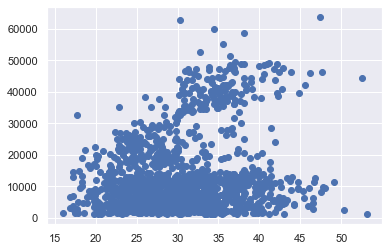

In [63]:
plt.scatter(raw_data['bmi'], raw_data['charges'])